In [1]:
using Plots
using DifferentialEquations
using ParameterizedFunctions

In [2]:
ball! = @ode_def BallBounce begin
    dy =  v
    dv = -g
end g

(::BallBounce{var"###ParameterizedDiffEqFunction#292", var"###ParameterizedTGradFunction#293", var"###ParameterizedJacobianFunction#294", Nothing, Nothing, ODESystem}) (generic function with 1 method)

In [3]:
function kick(u, t, integrator)
    t == 2
end

kick (generic function with 1 method)

In [4]:
function affect!(integrator)
    integrator.u[2] += 50
end

affect! (generic function with 1 method)

In [5]:
kick_ball = DiscreteCallback(kick, affect!)

DiscreteCallback{typeof(kick), typeof(affect!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT)}(kick, affect!, SciMLBase.INITIALIZE_DEFAULT, SciMLBase.FINALIZE_DEFAULT, Bool[1, 1])

In [6]:
u0 = [50.0, 0.0]
tspan = (0.0, 15.0)
p = (9.8, 0.9)

(9.8, 0.9)

In [7]:
prob = ODEProblem(ball!, u0, tspan, p, callback=kick_ball)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 15.0)
u0: 2-element Vector{Float64}:
 50.0
  0.0

In [8]:
sol = solve(prob, tstops=[2.0])

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 10-element Vector{Float64}:
  0.0
  0.00010203877555101957
  0.0011224265310612151
  0.011326304086163171
  0.11336507963718272
  1.1337528351473782
  2.0
  2.0
 10.662471648526218
 15.0
u: 10-element Vector{Vector{Float64}}:
 [50.0, 0.0]
 [49.99999994898163, -0.0009999800003999914]
 [49.99999382677754, -0.010999780004399906]
 [49.99937140269516, -0.11099778004439904]
 [49.93702695772239, -1.1109777804443903]
 [43.7015620930969, -11.110777784444302]
 [30.400000000000038, -19.599999999999994]
 [30.400000000000038, 30.400000000000006]
 [-73.9490956862519, -54.4922221555569]
 [-402.4999999999975, -96.99999999999996]

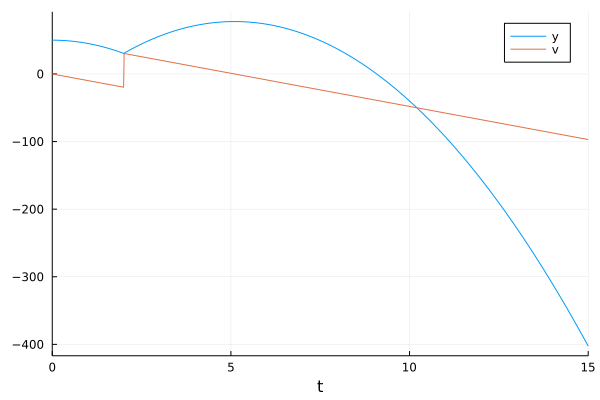

In [9]:
plot(sol)